# Использование [ансамблевых моделей](https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D1%8C_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_(%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD)) (или композиции моделей)

Идея использования ансамблевых моделей состоит в том, что оценивается результат совместного голосования различных моделей. Идеи объединения моделей в ансамбль могут быть различными. 

Использование ансамблевых моделей поддерживается в [scikit-learn.](https://scikit-learn.org/stable/modules/ensemble.html)

## Бутстрэп

Метод бутстрэпа заключается в следующем. Пусть имеется выборка $X$ размера $N$. Равномерно возьмем из выборки $N$ объектов с возвращением. Это означает, что мы будем $N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $X_1$. Повторяя процедуру K раз, сгенерируем K подвыборок $X_1$ ... $X_K$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.

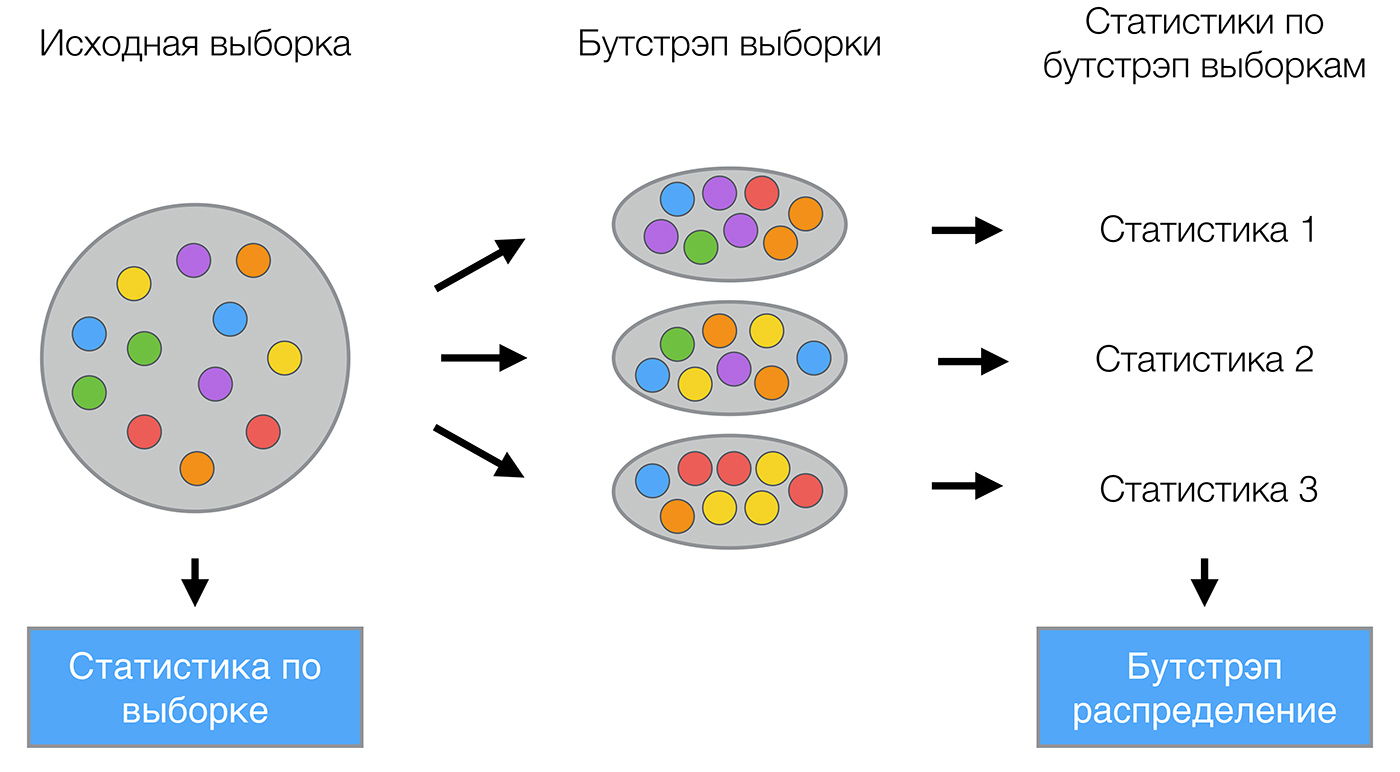

In [3]:
Image("img/bootstrap.jpg")

## Бэггинг

Bagging (от Bootstrap aggregation) — это один из первых и самых простых видов ансамблей. Он был придуман Лео Брейманом в 1994 году. Бэггинг основан на статистическом методе бутстрэпа.

Пусть имеется обучающая выборка $X$ размера $N$. С помощью бутстрэпа сгенерируем из этой выборки $K$ подвыборок $X_1$ ... $X_K$. Теперь на каждой выборке обучим свою модель $M_i(x)$. Итоговый классификатор будет усреднять ответы всех моделей (выбирать средний результат голосования): $M(x) = \frac{1}{K} \sum\limits_{i=1}^K M_i(x)$

Бэггинг позволяет **снизить дисперсию (variance)** обучаемого классификатора, уменьшая величину, на которую ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. Эффективность бэггинга достигается благодаря тому, что базовые алгоритмы, обученные по различным подвыборкам, получаются достаточно различными, и их ошибки взаимно компенсируются при голосовании, а также за счёт того, что объекты-выбросы могут не попадать в некоторые обучающие подвыборки.

**Важно** то что модель бэггинга строится на ансамбле **разных** обучающих выборок, но **одинаковых** моделей.

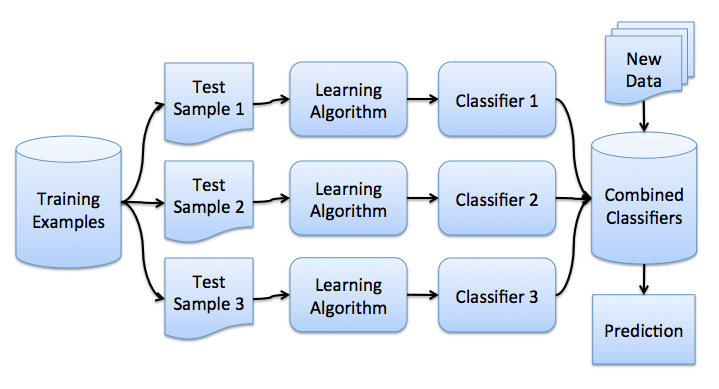

In [4]:
Image("img/bagging.png")

## [Случайный лес](https://ru.wikipedia.org/wiki/Random_forest)

Алгоритм случайного леса также предложен Лео Брейманом. Алгоритм сочетает в себе две основные идеи: метод бэггинга, предложенный Лео Брейманом, и метод случайных подпространств, предложенный Tin Kam Ho. 

Случайный лес можно рассматривать как алгоритмом бэггинга над решающими деревьями. 

Но при этом каждое решающее дерево строится на случайно выбранном подмножестве признаков. Эта особенность называется "feature bagging" и основана на [методе случайных подпространств](https://en.wikipedia.org/wiki/Random_subspace_method).

Метод случайных подпространств позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на случайно выбранных подмножествах признаков. Ансамбль моделей, использующих метод случайного подпространства, можно построить, используя следующий алгоритм:

1. Пусть количество объектов для обучения равно $N$, а количество признаков $D$.
1. Выбирается число отдельных моделей в ансамбле $L$.
1. Для каждой отдельной модели $l = 1..L$ выбирается число признаков $dl (dl < D)$. Как правило, для всех моделей используется только одно значение
$dl$.
1. Для каждой отдельной модели $l$ создается обучающая выборка путем отбора $dl$ признаков из $D$.
1. Производится обучение моделей $l = 1..L$, каждая модель обучается на отдельном подмножестве из $dl$ признаков.
1. Чтобы применить модель ансамбля к тестовой выборке, объединяются результаты отдельных моделей или мажоритарным голосованием или более сложными способами.

Почему именно деревья активно используются в ансамблевых моделях? Потому что они очень чувствительны к выбросам и изменению данных. Незначительное изменение обучающей выборки, удаление или добавление признаков может сильно изменить вид решающего дерева. Это является недостатком с точки зрения построения отдельного решающего дерева. Это же является преимуществом при использовании деревьев в ансамблевой модели, так как с помощью незначительного изменения обучающих данных или набора используемых признаков можно построить очень разные решающие деревья. Различные решающие деревья дадут хорошую "дисперсию" решений при объединении их в ансамбль.

### Принцип построения случайного леса:

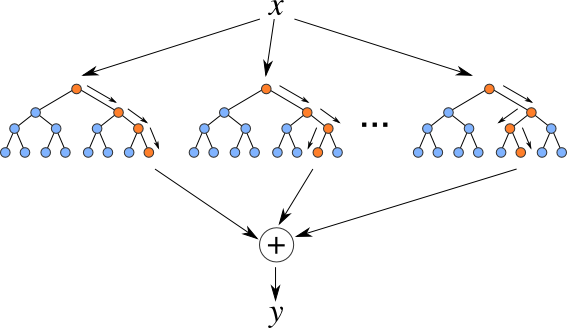

In [11]:
Image("img/rf.png")

### Алгоритм построения случайного леса

- Пусть количество объектов для обучения равно $N$, а количество признаков $D$.
- Выбирается число отдельных деревьев в ансамбле (случайном лесе) $L$. Для каждого отдельного дерева $tree_i = 1..L$ выбирается число признаков $dl (dl < D)$ для последующего случайного разбиения. Как правило, для всех моделей используется только одно значение $dl$.
- Для каждого дерева с индексом $i=1..L$ выполняются следующие действия:
    - Генерируется выборка $X_i$ с помощью бутстрэпа
    - Строится решающее дерево $tree_i$ по выборке $X_i$:
        - По заданному критерию выбирается лучший признак для ветвления дерева, делается ветвление в дереве по выбранному признаку и так до исчерпания выборки. В качестве критерия может использоваться критерий Джини или энтропийный критерий.
        - Дерево строится до тех пор, пока в каждом листе не более $leaf_{min}$ объектов или пока не будет достигнута определенная высота дерева.
        - При каждом разбиении сначала выбирается $dl$ случайных признаков из $D$ исходных, и оптимальное разделение выборки ищется только среди них.

- Итоговая модель $RandomForest(X) = \frac{1}{L} \sum\limits_{i=1}^L tree_i(X)$. То есть для задачи кассификации выбирается решение голосованием по большинству, а в задаче регрессии — среднее значение.

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

Рекомендуется в задачах классификации брать $dl=\sqrt{D}$, а в задачах регрессии $dl = D/3$. В библиотеке scikit-learn это признак max_features.

Для выбора параметра $leaf_{min}$ рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов. В библиотеке scikit-learn это признак min_samples_leaf.

Настройка гиперпараметров случайного леса хорошо описана в [блоге Александра Дьяконова.](https://dyakonov.org/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/comment-page-1/)

Алгоритм случайного леса активно применяется на практике и часто оказывается лучшим при сравнении метрик качества.

Случайный лес реализуется в scikit-learn с помощью классов [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и [RandomForestRegressor.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)